In [18]:
import streamlit as st
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pprint
from deap import base, creator, tools, algorithms
import pandas as pd
from modules.knapsack_tools import ITEMS_KNAPSACK, MAX_CAPACITY, apply_tournament, KnapsackProblem, run_knapsack_tournament



In [19]:
df_full_knapsack = pd.read_csv('reports/knapsack_full_experiments.csv')
df_full_knapsack.head()

,Unnamed: 0,max_found_at_generation,end_mean_fitness_population,end_max_fitness,initial_population,max_generation,crossover_probability,mutation_probability,selection_method,selection_strategy_name,k_value
0,0,48,961.9,970.0,50,50,0.1,0.1,<function selTournament at 0x00000213A144F520>,Tournament,1
1,1,13,965.9,970.0,50,50,0.1,0.1,<function selTournament at 0x00000213A144F520>,Tournament,2
2,2,4,858.9,860.0,50,50,0.1,0.1,<function selTournament at 0x00000213A144F520>,Tournament,3
3,3,42,935.5,950.0,50,50,0.1,0.1,<function selTournament at 0x00000213A144F520>,Tournament,4
4,4,41,985.2,1000.0,50,50,0.1,0.2,<function selTournament at 0x00000213A144F520>,Tournament,1


In [20]:

selected_max_df = df_full_knapsack[df_full_knapsack['end_max_fitness'] >= 1020]


In [27]:
# linear relationship. max_found_at_generation and mutation_probability
from sklearn.linear_model import LinearRegression

In [29]:
from scipy.stats import linregress


In [30]:
linregress(selected_max_df['mutation_probability'], selected_max_df['max_found_at_generation'])

LinregressResult(slope=-10.263877170580605, intercept=22.522917234960566, rvalue=-0.05144740085141358, pvalue=0.059445531776354574, stderr=5.440741640008741)

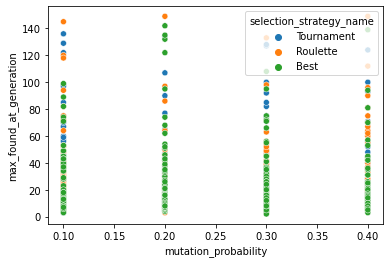

In [33]:
sns.scatterplot(data=selected_max_df, x='mutation_probability', y='max_found_at_generation', hue='selection_strategy_name')

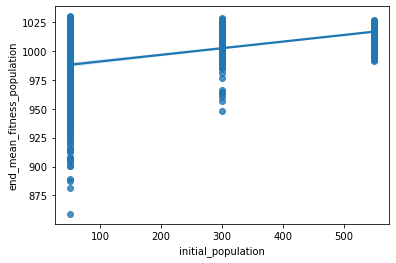

In [42]:
# Plot relationship initial population size and mean/max fitness.
sns.regplot(data=df_full_knapsack, x='initial_population', y='end_mean_fitness_population')

In [40]:
# Linear regression.
linregress(df_full_knapsack['initial_population'], df_full_knapsack['end_mean_fitness_population'])

LinregressResult(slope=0.0572676325757576, intercept=985.2328901164421, rvalue=0.5170708190600998, pvalue=9.302278745284642e-119, stderr=0.002281830899062215)

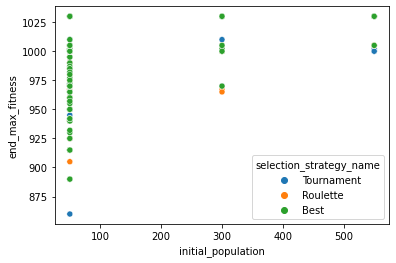

In [39]:
# Plot relationship initial population size and mean/max fitness.
sns.scatterplot(data=df_full_knapsack, x='initial_population', y='end_max_fitness', hue='selection_strategy_name')

In [43]:
linregress(df_full_knapsack['initial_population'], df_full_knapsack['end_max_fitness'])

LinregressResult(slope=0.057576388888888906, intercept=1002.3497685185185, rvalue=0.5190784869886601, pvalue=7.965403256212276e-120, stderr=0.002282013484407436)